In [ ]:
# !pip install faiss-cpu --no-cache

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.6 MB 4.4 MB/s 


In [7]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import time
import glob

## ANÁLISIS DE OCUPACIÓN REGISTRADO SEGÚN LAS ANTENAS WIFI

El estudio de ocupación de los espacios públicos se van a estudiar según el tráfico de las antenas WIFI. En una segunda etapa se tratará de correlacionar este tráfico con la situación real en cada momento a través de otros datos de carácter público relacionados con la docencia impartida.
El objetivo de esta primera etapa del proyecto será la creación de alertas y su visualización en un mapa del campus: https://krono.act.uji.es/datathon/web/visor.html

**Arquitectura de Servicios Propuesta**

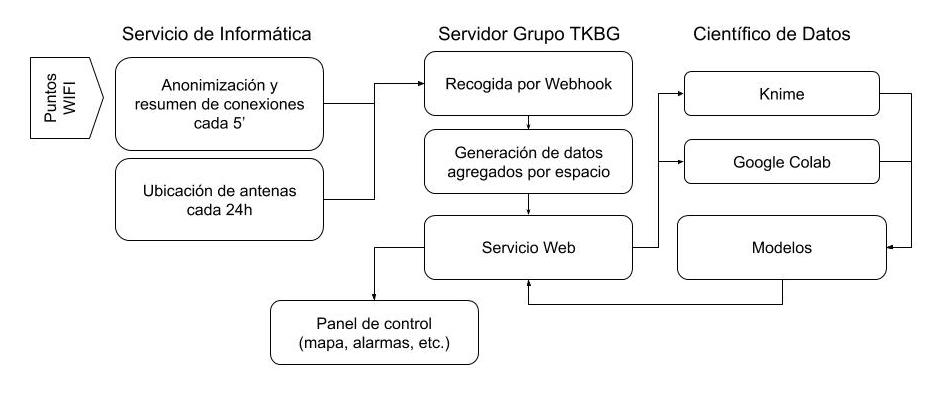


Endpoint (punto de acceso): https://krono.act.uji.es/datathon

Métodos:

*   2 Webhooks para actualiza datos de forma continua:
  * POST /wifi/xxxx antenas-conexiones (cada 5')
  * POST /wifi/xxxx antena-espacio (cada 24h)
*   GET /datathon/wifi/last-data :  antenas-conexiones (últimos 5')
*   GET /datathon/wifi/last-loc : antenas-espacio_UJI (últimas 24h)
*   GET /datathon/wifi/all-data : antenas-conexiones (todas)  
*   GET /datathon/wifi/all-loc :  antenas-espacio_UJI (todas)
*   GET /datathon/web/wifi-loc.csv : dataset espacio_UJI (del día anterior)

In [19]:
##El siguiente URL contiene el dataset actual generado en el servidor (proxy)

## Update from web
# url="https://krono.act.uji.es/datathon/web/wifi-loc.csv"
# df = pd.read_csv(url)
# df.to_csv(f"./.res/KRONO_WIFI_{time.time()}.csv")

# Load last backup
lastcopy = glob.glob(".res/" + "*.csv")
lastcopy = [item for item in lastcopy if "KRONO_WIFI_" in item]
lastcopy = sorted(lastcopy)[-1]
df = pd.read_csv(lastcopy)
print(lastcopy)

df.head(1)

.res/KRONO_WIFI_1728923579.7958019.csv


,Unnamed: 0,ACO101SD,CD1003BX,CD1004BU,CD1021CP,CD1104BL,CD1116BF,CD1202BL,CD1302BL,CD1503BG,...,UB1210SR,UB1314SD,UB1507DD,UB1518SD,UB1601CP,UB1S31CP,UE1002DL,UE1101CI,UE1S01CI,_dt
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,8,2020-07-22T05:25:48.597Z


In [ ]:
df2 = pd.melt(df.iloc[-1000:], id_vars='_dt', var_name='Location', value_name="Connections")
df2

,_dt,Location,Connections
0,2023-09-28T10:56:01.837Z,ACO101SD,7
1,2023-09-28T11:01:02.337Z,ACO101SD,5
2,2023-09-28T11:06:01.452Z,ACO101SD,3
3,2023-09-28T11:11:01.519Z,ACO101SD,3
4,2023-09-28T11:16:02.455Z,ACO101SD,4
...,...,...,...
421995,2023-10-01T21:51:01.953Z,UE1S01CI,7
421996,2023-10-01T21:56:01.780Z,UE1S01CI,7
421997,2023-10-01T22:01:02.696Z,UE1S01CI,7
421998,2023-10-01T22:06:01.598Z,UE1S01CI,2


In [ ]:
df2.to_csv("antenas_wifi_data.csv")

Fecha de última actualización de los datos:

In [ ]:
df.head(1)['_dt']

0    2020-07-22T05:25:48.597Z
Name: _dt, dtype: object

In [ ]:
df.tail(1)['_dt']

1    2023-10-01T22:11:01.379Z
Name: _dt, dtype: object

Estadísticas de observaciones registradas:

In [ ]:
df.describe()

,ACO101SD,AGS200CI,CD1003BX,CD1004BU,CD1021CP,CD1104BL,CD1116BF,CD1202BL,CD1302BL,CD1503BG,...,UB1208SR,UB1210SR,UB1314SD,UB1507DD,UB1518SD,UB1601CP,UB1S31CP,UE1002DL,UE1101CI,UE1S01CI
count,244092.000000,244092.000000,244092.000000,244092.000000,244092.000000,244092.000000,244092.000000,244092.000000,244092.000000,244092.000000,...,244092.000000,244092.000000,244092.000000,244092.000000,244092.000000,244092.000000,244092.000000,244092.000000,244092.000000,244092.000000
mean,3.296892,0.952715,0.231753,0.113060,1.877091,0.871983,4.883909,5.546024,0.477271,1.961342,...,0.867902,0.353682,0.469577,1.467443,0.015035,0.010713,0.103576,0.134494,0.004175,10.723248
std,4.520367,2.543369,0.536056,0.381529,3.876658,1.861995,9.866802,12.666939,1.145647,4.991994,...,0.782029,1.026939,1.149577,2.325009,0.131374,0.106931,0.428783,0.494434,0.082137,14.464562
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,5.000000,1.000000,0.000000,0.000000,2.000000,1.000000,5.000000,3.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
max,57.000000,51.000000,7.000000,6.000000,36.000000,26.000000,74.000000,119.000000,13.000000,60.000000,...,13.000000,24.000000,14.000000,20.000000,5.000000,3.000000,11.000000,19.000000,7.000000,131.000000


In [ ]:
antenas = list(df.columns)
print('Número de antenas:', len(antenas))

Número de antenas: 423


## Estadísticas por edificios

In [ ]:
## Datos agregados por centros

md = [e for e in antenas if e.startswith('MD') or e.startswith('MI')]

print('Antenas FCS:',len(md))

df['FCS'] = df.apply(lambda row: sum([row[c] for c in md]), axis=1)

Antenas FCS: 52


In [ ]:
estce = [e for e in antenas if e.startswith('TD') or e.startswith('TI') or e.startswith('TC')]

print('Antenas ESTCE:',len(estce))

df['ESTCE'] = df.apply(lambda row: sum([row[c] for c in estce]),axis=1)
df['ESTCE'].describe()

fcje = [e for e in antenas if e.startswith('J')]
fcsh = [e for e in antenas if e.startswith('H')]

print('Antenas FCJE:',len(fcje))
print('Antenas FCHS:',len(fcsh))

df['FCJE'] = df.apply(lambda row: sum([row[c] for c in fcje]),axis=1)
df['FCHS'] = df.apply(lambda row: sum([row[c] for c in fcsh]),axis=1)

biblio = [e for e in antenas if e.startswith('CD')]

print('Antenas Biblioteca:',len(biblio))

df['CD'] = df.apply(lambda row: sum([row[c] for c in biblio]),axis=1)


Antenas ESTCE: 97
Antenas FCJE: 63
Antenas FCHS: 83
Antenas Biblioteca: 19


In [ ]:
#TAMAÑO DEL DATASET
df.shape

(333556, 428)

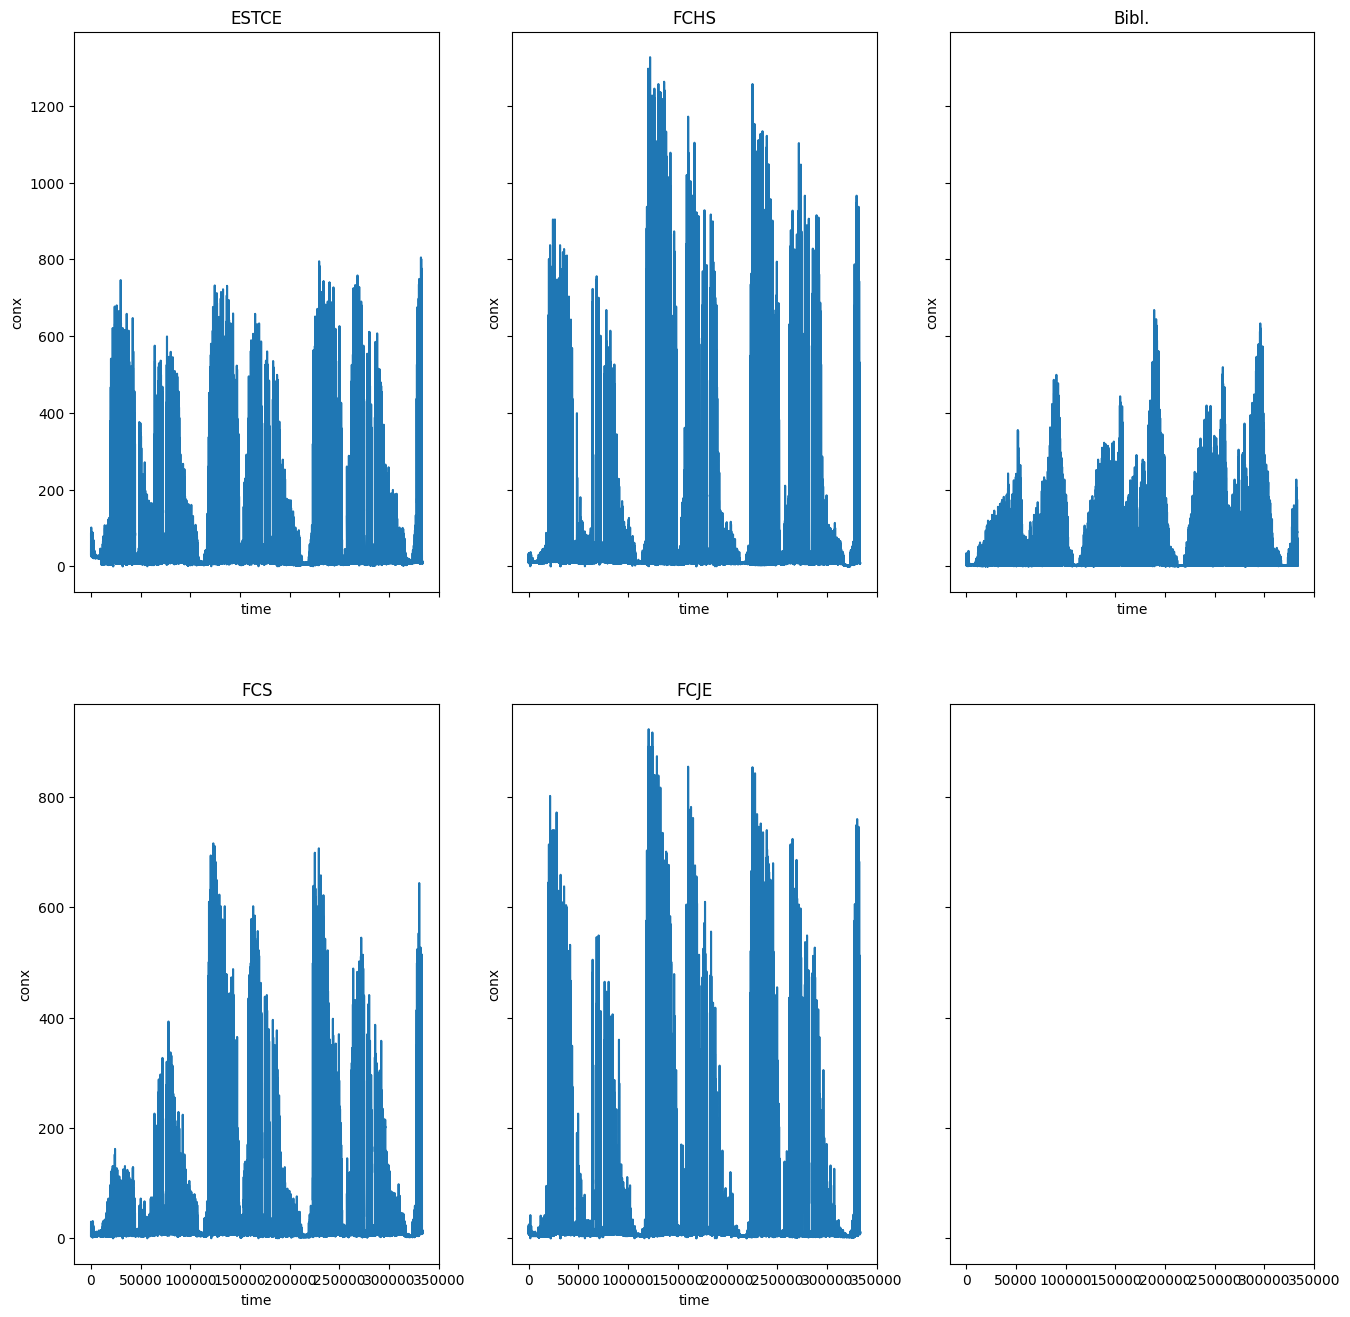

In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
fig.set_size_inches(16, 16, forward=True)
ax[0][0].set(title="ESTCE", xlabel="time", ylabel="conx")
ax[1][0].set(title="FCS",   xlabel="time", ylabel="conx")
ax[0][1].set(title="FCHS",  xlabel="time", ylabel="conx")
ax[1][1].set(title="FCJE",  xlabel="time", ylabel="conx")
ax[0][2].set(title="Bibl.", xlabel="time", ylabel="conx")
ax[0][0].plot(range(df.shape[0]),df['ESTCE'])
ax[1][0].plot(range(df.shape[0]),df['FCS'])
ax[0][1].plot(range(df.shape[0]),df['FCHS'])
ax[1][1].plot(range(df.shape[0]),df['FCJE'])
ax[0][2].plot(range(df.shape[0]),df['CD'])

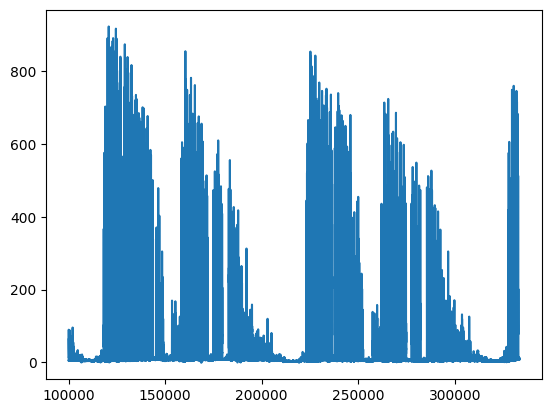

In [ ]:
cut = 100000 #@param
centro = 'FCJE' #@param ['ESTCE','FCJE','FCS','CD']
plt.plot(range(cut, df.shape[0]),df[centro][cut:])

## Datos Geolocalizados y áreas de espacios interiores UJI

In [ ]:
url="https://krono.act.uji.es/datathon/web/Espacios_Interiores_xy.csv"
df2 = pd.read_csv(url)
df2.head(1)

,X,Y,OBJECTID,SPACEID,FLOORKEY,SECTIONKEY,BUILDING,FLOOR,SHORTNAME,LONGNAME,DESCRIP,SPACETYPE,CEILINGHEI,BASEELEV,FLOORAREA,CAPACITY,Shape_Leng,Shape_Area
0,-7568.646294,4.864867e+06,1,TD1401CI,TD14,1,TD,4,1.0,Instal·lacions,Instal·lacions,CI,0,0.0,19.51,0,25.426366,33.357192


In [ ]:
##TODO: Comprobar si SPACEID es primaria? Si no, deberían agruparse

In [ ]:
##colores para idenficar espacios con antenas

def getColor(x):
  if x[3] in antenas: return 'red'
  if x[3].endswith('CP'): return 'green'
  return 'gray'


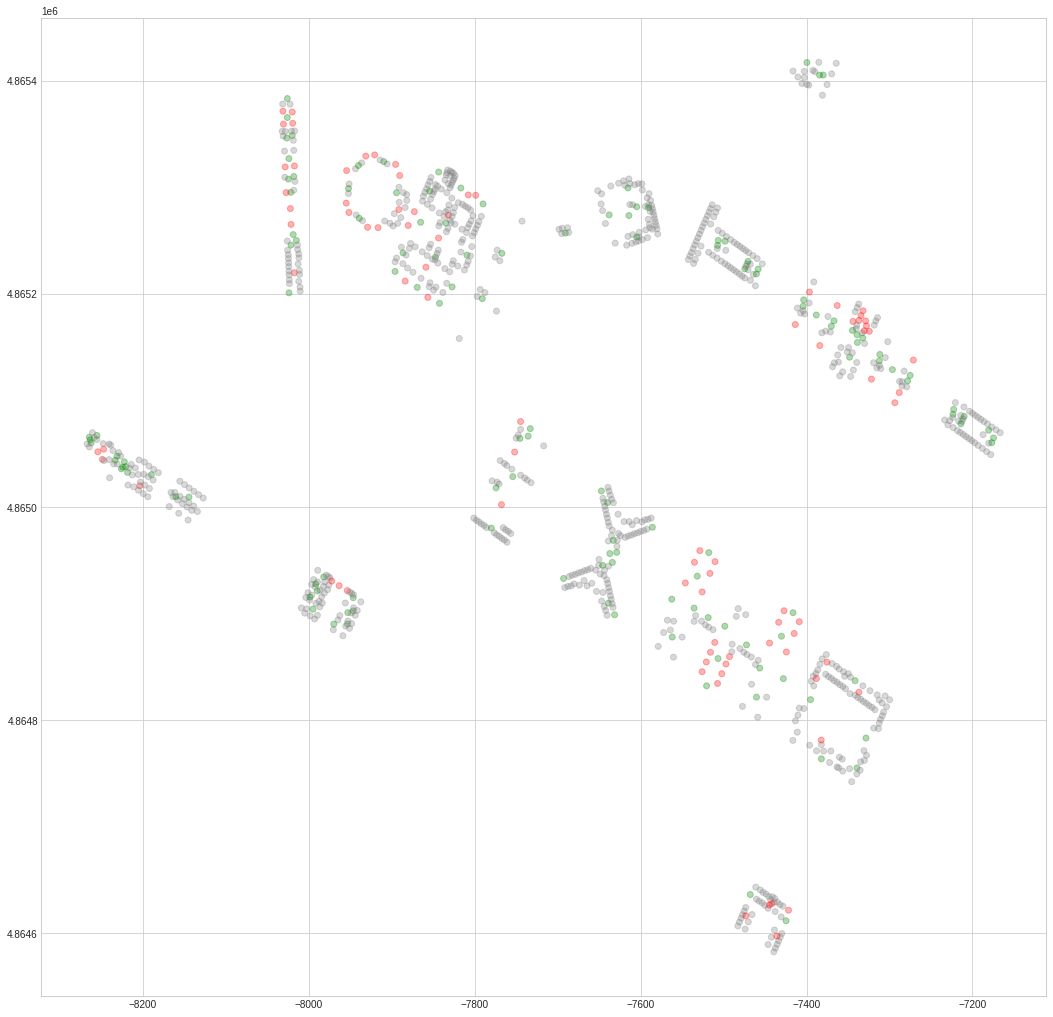

In [ ]:
#MAPA DE LA UJI ## debería dibujarse por niveles!!

plt.style.use('seaborn-whitegrid')

fig = plt.figure()
fig.set_size_inches(18, 18, forward=True)
ax = plt.axes()

level = '1' #@param ["S", "1", "2", "3", "4", "5"]

dflevel = df2[df2['FLOOR'] == level]

colors = dflevel.apply(lambda x: getColor(x), axis=1)

ax.scatter(dflevel['X'],dflevel['Y'],c=colors,alpha=0.3)

In [ ]:
import faiss
import numpy as np

In [ ]:
##Para calcular las distancias entre espacios debemos seleccionarlos primero por nivel (elegimos la planta 1)

df2['CAPACITY'] = round(df2['FLOORAREA']/4.)

level1 = df2[(df2['FLOOR'] == '1') & (df2['BUILDING'] == 'TD')] # 1er piso TD

X = level1[["X","Y"]].to_numpy(dtype=np.float32)

## Indexamos los puntos para sacar vecinos más cercanos
#Ordenar una serie de datos o informaciones de acuerdo a un criterio común a todos ellos, para facilitar su consulta y análisis.
index = faiss.IndexFlatL2(X.shape[1]) #X.shape[1] te dice la dimensión del array con el que estás trabajando
# index Flat utiliza el algoritmo de fuerza fruta para calcular distancias
#faiss calcula rrápido las distancias de los sitios
index.add(np.ascontiguousarray(X)) #Ordena el array de menor a mayor

In [ ]:
## Ahora sacaríamos los 5 vecinos más cercanos de los espacios publicos

publicTDx1 = df2[(df2['FLOOR'] == '1') & (df2['BUILDING'] == 'TD') & (df2['SPACETYPE']=='CP')] # toda la info de las aulas

Xpublic = publicTDx1[["X","Y"]].to_numpy(dtype=np.float32)

distances, indices = index.search(np.ascontiguousarray(Xpublic), k=10)

In [ ]:
distances

array([[   0.      ,  148.42805 ,  178.65921 ,  344.33047 ,  357.6257  ,
         771.77313 ,  962.69965 , 1194.9628  , 1355.1179  , 1482.1343  ],
       [   0.      ,  180.31824 ,  240.2892  ,  248.73624 ,  259.5673  ,
         585.7992  ,  642.29803 ,  677.7506  , 1309.5039  , 1584.7881  ],
       [   0.      ,   39.745888,   52.129513,  212.56796 ,  336.82285 ,
         393.22656 ,  596.22076 ,  691.46234 ,  716.4874  ,  771.77313 ],
       [   0.      ,   47.277405,  126.96051 ,  141.28247 ,  228.00298 ,
         290.21222 ,  357.0321  ,  363.13577 ,  925.5947  , 1194.6177  ],
       [   0.      ,  408.15707 ,  425.53687 ,  506.7301  ,  794.2269  ,
         843.8082  , 1056.3293  , 1067.1213  , 1151.1497  , 1260.5708  ],
       [   0.      ,   52.556023,  144.0274  ,  225.60757 ,  334.4101  ,
         361.7815  ,  427.7581  ,  614.8286  ,  687.2057  ,  747.70026 ],
       [   0.      ,  193.56824 ,  242.48624 ,  243.0392  ,  244.81728 ,
         585.7992  ,  656.0271  ,  699.98706 

In [ ]:
indices

array([[11, 26, 24, 23, 25, 20, 12, 13, 59, 14],
       [19, 17, 21, 18, 15, 16, 22, 62, 13, 20],
       [20, 12, 13, 14, 24,  3,  2, 18, 43, 11],
       [27,  8,  7, 41, 10,  9, 39, 40, 30, 31],
       [29,  9, 10, 34, 32,  8,  7, 31, 30, 27],
       [32, 31, 30, 28, 36, 46,  1,  0, 34, 10],
       [33, 35, 34, 37, 36, 56, 38, 60, 32, 31],
       [43,  2, 44,  3, 14, 58, 57, 13, 12, 42],
       [46,  1, 28,  0, 45, 31, 30, 32, 47, 54],
       [47, 45,  6, 58,  0, 54, 46,  5,  1, 57],
       [53, 48, 55, 42, 52, 50, 54, 57, 58, 51],
       [59, 15, 26, 20, 13, 12, 11, 18, 24, 19],
       [60, 56, 38, 35, 37, 33, 36, 34, 32, 46],
       [61, 49, 51, 50, 52, 53, 48, 55, 42, 54],
       [62, 16, 22, 17, 21, 19, 15, 18,  4, 13]])

In [ ]:
##10 primeros espacios de la planta 1
level1.iloc[0:10]['SPACEID']

178    TD0128CA
179    TD0129CL
180    TD0127CA
181    TD0126CL
182    TD0125DP
183    TD0113ER
184    TD0112FR
185    TD1111AL
186    TD1111AL
187    TD1110AL
Name: SPACEID, dtype: object

In [ ]:
##Sacando los espacios vecinos del primer elemento
print([level1.iloc[i]['SPACEID'] for i in indices[-1]])

['TD21XXCP', 'TD2104AA', 'TD2103AA', 'TD2105AA', 'TD2102AA', 'TD2111CP', 'TD2101AA', 'TD2106AA', 'TD0125DP', 'TD2114CI']


In [ ]:
##Sacando el area de esos vecinos
print([level1.iloc[i]['FLOORAREA'] for i in indices[4]])

[17.32, 126.9, 126.9, 132.34, 289.9, 54.07, 54.07, 7.38, 13.66, 112.29]


In [ ]:
indices.shape

(15, 10)

In [ ]:
##EN ESTE PUNTO DEBERÍAMOS ASOCIAR CADA ESPACIO PUBLICO A LAS ANTENAS MAS CERCANAS
antenasTDx1 = [e for e in antenas if e.startswith('TD') and e[3]=='1']

neighbours = {}
for i in range(len(indices)):
  espacios = [level1.iloc[indices[i,j]]['SPACEID'] for j in range(indices.shape[1]) if distances[i,j]<1500]
  aux =  [e for e in espacios if e in antenasTDx1]
  if len(aux)>0:
     neighbours[espacios[0]] = aux
     print(espacios[0], neighbours[espacios[0]] )


TD2111CP ['TD2105AA', 'TD2102AA', 'TD2106AA', 'TD2101AA', 'TD2104AA', 'TD2103AA']
TD2116CP ['TD2106AA']
TD1114CP ['TD1106AA']
TD1118CP ['TD1101AA', 'TD1106AA']
TD1113CP ['TD1105AA', 'TD1106AA', 'TD1102AA', 'TD1101AA', 'TD1104AA', 'TD1103AA']
TD0123CP ['TD0102AI']
TD0122CP ['TD0130AI']
TD0119CP ['TD0130AI']
TD0118CP ['TD0103AI', 'TD0108AI', 'TD0102AI', 'TD0107AI', 'TD0104AI', 'TD0130AI', 'TD0106AI']
TD2112CP ['TD2101AA', 'TD2106AA']
TD11XXCP ['TD1104AA', 'TD1103AA', 'TD1105AA', 'TD1102AA', 'TD1101AA']
TD01XXCP ['TD0105AI', 'TD0106AI', 'TD0104AI', 'TD0107AI', 'TD0103AI', 'TD0108AI', 'TD0102AI']
TD21XXCP ['TD2104AA', 'TD2103AA', 'TD2105AA', 'TD2102AA', 'TD2101AA']


In [ ]:
level1.loc[level1['SPACEID'] == 'TD2111CP']

,X,Y,OBJECTID,SPACEID,FLOORKEY,SECTIONKEY,BUILDING,FLOOR,SHORTNAME,LONGNAME,DESCRIP,SPACETYPE,CEILINGHEI,BASEELEV,FLOORAREA,CAPACITY,Shape_Leng,Shape_Area
197,-7430.191202,4.864879e+06,198,TD2111CP,TD21,2,TD,1,11.0,Corredor/Vestíbul,Corredor/Vestíbul,CP,0,0.0,170.23,43.0,116.740908,302.876343


In [ ]:
##Extendemos el dataframe principal con los espacios publicos
for cp in neighbours:
  df[cp] = df.apply(lambda row: sum([row[c] for c in neighbours[cp] if c in row]), axis=1)

df.head(1)

,ACO101SD,AGS200CI,CD1003BX,CD1004BU,CD1021CP,CD1104BL,CD1116BF,CD1202BL,CD1302BL,CD1503BG,CD1508BL,CD1603CI,CD2001CP,CD2005AI,CD2026SD,CD2101BL,CD2201BL,CD2301BL,CD2401BL,CD2501BL,CD2602CI,DAA018SC,DAA019CP,DAA025CI,DB0102AA,DB0112CP,DB0210CP,DB0211CP,DB0214AA,DC0024CP,DC0S01CP,DC1001CP,DC1S11CA,DC3001CP,DC3103CI,DC3S04CI,FF0020CI,G01001EL,GG2004SD,GG5001ET,...,UB1127CP,UB1141SD,UB1206CC,UB1208SR,UB1210SR,UB1314SD,UB1507DD,UB1518SD,UB1601CP,UB1603CI,UB1S31CP,UE1002DL,UE1101CI,UE1S01CI,_dt,FCS,ESTCE,FCJE,FCHS,CD,any,mes,dia_hora,dia,hora_completa,hora,minuto,TD2111CP,TD2116CP,TD1114CP,TD1118CP,TD1113CP,TD0123CP,TD0122CP,TD0119CP,TD0118CP,TD2112CP,TD11XXCP,TD01XXCP,TD21XXCP
0,1,2,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,1,2,0,0,0,0,0,0,1,5,0,0,2,0,0,0,4,0,3,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2020-07-22T05:25:48.597Z,5,31,9,13,5,2020,07,22T05:25:48.597Z,22,05:25:48.597Z,05,25,0,0,0,0,2,4,4,4,13,0,2,9,0


## ANALISIS GLOBAL POR PLANTA

In [ ]:
## Aggregamos datos por hora

df['any'] = df.apply(lambda x: x['_dt'].split('-')[0], axis=1)
df['mes'] = df.apply(lambda x: x['_dt'].split('-')[1], axis=1)
df['dia_hora'] = df.apply(lambda x: x['_dt'].split('-')[2], axis=1)
df['dia'] = df.apply(lambda x: x['dia_hora'].split('T')[0], axis=1)
df['hora_completa'] = df.apply(lambda x: x['dia_hora'].split('T')[1], axis=1)
df['hora'] = df.apply(lambda x: x['hora_completa'].split(':')[0], axis=1)
df['minuto'] = df.apply(lambda x: x['hora_completa'].split(':')[1], axis=1)

res= df.groupby(['mes', 'hora']).mean() ##max achieved per hour

res.head(1)


,,ACO101SD,AGS200CI,CD1003BX,CD1004BU,CD1021CP,CD1104BL,CD1116BF,CD1202BL,CD1302BL,CD1503BG,CD1508BL,CD1603CI,CD2001CP,CD2005AI,CD2026SD,CD2101BL,CD2201BL,CD2301BL,CD2401BL,CD2501BL,CD2602CI,DAA018SC,DAA019CP,DAA025CI,DB0102AA,DB0112CP,DB0210CP,DB0211CP,DB0214AA,DC0024CP,DC0S01CP,DC1001CP,DC1S11CA,DC3001CP,DC3103CI,DC3S04CI,FF0020CI,G01001EL,GG2004SD,GG5001ET,...,TT1007CI,TT2001TL,TT2002TL,UA1012CI,UA1022SD,UA1S02CI,UB1017CP,UB1118CP,UB1127CP,UB1141SD,UB1206CC,UB1208SR,UB1210SR,UB1314SD,UB1507DD,UB1518SD,UB1601CP,UB1603CI,UB1S31CP,UE1002DL,UE1101CI,UE1S01CI,FCS,ESTCE,FCJE,FCHS,CD,TD2111CP,TD2116CP,TD1114CP,TD1118CP,TD1113CP,TD0123CP,TD0122CP,TD0119CP,TD0118CP,TD2112CP,TD11XXCP,TD01XXCP,TD21XXCP
mes,hora,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01,00,0.295455,0.113636,0.0,0.0,0.0,0.0,0.007576,0.0,0.0,0.0,0.0,0.909091,0.007576,0.0,0.0,0.015152,0.0,0.371212,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.575758,0.954545,0.0,0.0,1.0,0.0,0.0,0.007576,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.537879,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022727,4.0,8.583333,6.454545,9.992424,1.310606,0.090909,0.0,0.0,0.0,0.0,0.0,0.05303,0.05303,0.689394,0.0,0.0,0.636364,0.090909


In [ ]:
TDx1 = [e for e in antenas if e.startswith('TD') and e[2]=='1']

res['TDx1'] = res.apply(lambda row: sum([row[c] for c in TDx1]), axis=1) ## Should be sum of connections across space

print(res.columns)

Index(['ACO101SD', 'AGS200CI', 'CD1003BX', 'CD1004BU', 'CD1021CP', 'CD1104BL',
       'CD1116BF', 'CD1202BL', 'CD1302BL', 'CD1503BG',
       ...
       'TD1113CP', 'TD0123CP', 'TD0122CP', 'TD0119CP', 'TD0118CP', 'TD2112CP',
       'TD11XXCP', 'TD01XXCP', 'TD21XXCP', 'TDx1'],
      dtype='object', length=456)


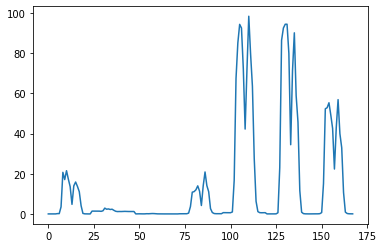

In [ ]:
#Represento el número de conexiones con el paso de las horas en el piso 1 del eficio TD
plt.plot(range(res.shape[0]),res['TDx1'])

Capacidad total: 638.0


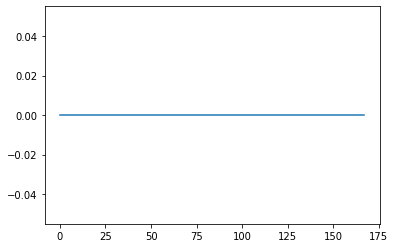

In [ ]:
##NOS CENTRAMOS EN LOS ESPACIOS PUBLICOS (acabados en CP)

#AÑADIMOS LA COLUMNA ALARMA AL DATAFRAME RES
piso1TDcap=  publicTDx1.sum(axis=0)['CAPACITY']

print('Capacidad total:', piso1TDcap)

##Divido por 10 la capacidad para que se vea como se disparan las alarmas
res['ALARMA'] = res.apply(lambda row: 1 if row['TDx1'] > piso1TDcap else 0, axis=1)

plt.plot(range(res.shape[0]),res['ALARMA'])


In [ ]:
for spaceid in neighbours:
  cap = (df2[df2['SPACEID'] == spaceid]['CAPACITY']).to_numpy(dtype=np.float32)[0]
  if res[spaceid].max() > cap:
    print("ALARM:", spaceid, cap, max(res[spaceid]))

ALARM: TD1114CP 4.0 7.478494623655914


207    4.0
Name: CAPACITY, dtype: float64


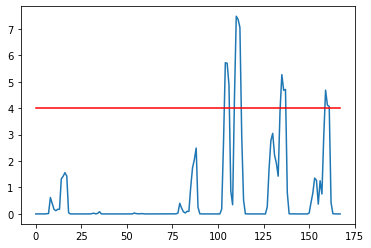

In [ ]:
## Observando un espacio publico concreto
spaceid = "TD1114CP" #@param ['TD2111CP', 'TD2116CP', 'TD1114CP', 'TD1118CP', 'TD1113CP', 'TD0123CP', 'TD0122CP', 'TD0119CP', 'TD0118CP', 'TD2112CP', 'TD11XXCP', 'TD01XXCP', 'TD21XXCP']
capacity = df2[df2['SPACEID'] == spaceid]['CAPACITY']

#print(list(neighbours.keys()))
print(capacity)

plt.plot(range(res.shape[0]),res[spaceid])
plt.plot(range(res.shape[0]),np.full((res.shape[0],1), capacity), color="red" )

In [ ]:
#TODO: POST the alarm state of the last day to the server for visualizing them in the map

#Translate x,y to lat long

def xy2ll(x,y):
    a  = 19./206 ## x, long
    a0 = 3557./206
    b  = 40./571
    b0 = 33762807./571
    sc = 10000
    return [b*y/sc + b0/sc, a*x/sc + a0/sc]

## TD2206AA,BAJO,39.99264,-0.06685,1,132.34  ##SPACEID,ALARM,long,lat,FLOOR,AREA



El mapa de alertas se visualizará en https://krono.act.uji.es/datathon/web/visor.html